<a href="https://colab.research.google.com/github/ozgedurna/Data/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('/content/ds_salaries.csv')

In [ ]:
#datascience alanındaki maaşları inceleyen bir veri setim var. bu veri setini kullanarak senior pozisyonunda çalışanların maaşlarını karşılaştıracağım.

In [89]:
## Veri Setini İnceleme

In [90]:
def check_df(dataframe):
    print(dataframe.shape)
    print(dataframe.columns)
    dataframe.info()
    print(dataframe.dtypes)
    print(dataframe.head())
    print(dataframe.tail())
    print(dataframe.isnull().sum())


In [66]:
check_df(df) # veri setim 3755 satır ve 11 sütundan oluşuyor. sütun adlarının neyi ifade ettiğini aşağıda açıklayacağım.veri setimde hiç null değeri yok.

(3755, 11)
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
m

In [67]:
'''
work_year : çalışma yılı
experience level: deneyim seviyesi
employment type: çalışma tipi
job_title:ünvan
salary:maaş
salary_currency:maaşın hangi döviz biriminde olduğu
salary_in_usd:dolar bazında maaş
employee_residence:çalışanların bulunduğu ülke
remote_ratio:remotuzaktan çalışma oranı
company_location:şirketin bulunduğu yer
company_size: şirketin büyüklüğü
'''


' \nwork_year : çalışma yılı\nexperience level: deneyim seviyesi\nemployment type: çalışma tipi\njob_title:ünvan\nsalary:maaş\nsalary_currency:maaşın hangi döviz biriminde olduğu\nsalary_in_usd:dolar bazında maaş\nemployee_residence:çalışanların bulunduğu ülke\nremote_ratio:remotuzaktan çalışma oranı\ncompany_location:şirketin bulunduğu yer\ncompany_size: şirketin büyüklüğü\n'

In [91]:
#İstatistiksel Analiz

In [92]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


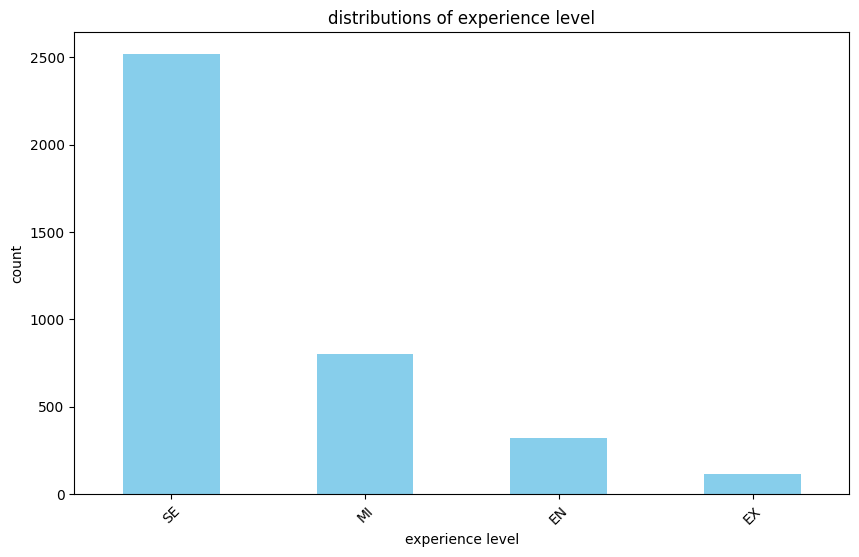

In [93]:
# Deneyim seviyelerini sayarak deneyim seviyelerinin dağılımına bakıyorum
experience_counts = df['experience_level'].value_counts()
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='skyblue')
plt.title('distributions of experience level')
plt.xlabel('experience level')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

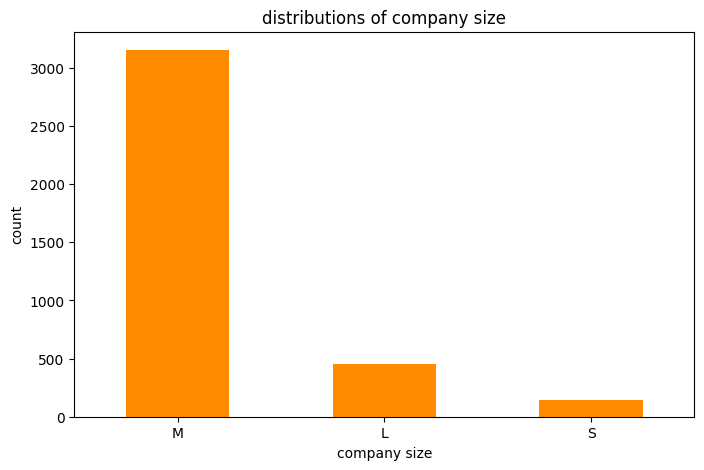

In [94]:
# Şirket büyüklüklerini sayarak barplot methoduyla görselleştirip firma ölçeklerinin dağılımına bakıyorum
company_size_counts = df['company_size'].value_counts()
# plt.figure(figsize=(8, 5))
company_size_counts.plot(kind='bar', color='darkorange')
plt.title('distributions of company size')
plt.xlabel('company size')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Karşılaştırmayı t-test ve p-value değerlerini kullanarak yapacağımdan aşağıda t-test yapıyorum.

In [88]:
from scipy.stats import ttest_ind
large_senior_salaries = df[(df['experience_level'] == 'SE') & (df['company_size'] == 'L')]['salary_in_usd']
small_senior_salaries = df[(df['experience_level'] == 'SE') & (df['company_size'] == 'S')]['salary_in_usd']
t_stat, p_value = ttest_ind(large_senior_salaries, small_senior_salaries)
t_stat, p_value

(4.137156256719924, 4.818760908867725e-05)

In [85]:
#p-value'yu, α = 0.05 olarak aldığım anlamlılık değeriyle karşılaştırdığımda p-değeri alfa değerinden çok daha küçük çıktığını buluyorum. bu iki grup arasındaki farkı istatistiki olarak anlamlı bulunur yorumu yapıyorum.

In [86]:
#t değeri kritik değeri aşıyor ve elde edilen p değeri, large ölçekli şirketlerdeki senior level çalışanların maaşları ile small ölçekli şirketlerdeki senior level çalışanların maaşları arasında istatistiksel olarak anlamlı bir fark olduğunu gösterir.